# Test file for the dataTools package

In [1]:
%matplotlib inline
from dataTools.data.Caribic import Caribic
from dataTools.data.CampaignData import CampaignData
from dataTools.data.Model import EMAC
from dataTools.data.local import MaunaLoa

import dataTools.dictionaries as dcts

In [2]:
caribic = Caribic()

var = dcts.get_subs('N2O')
o3 = dcts.get_subs('int_O3')
xcoord = dcts.get_coord('geometry.x')
ycoord = dcts.get_coord('geometry.y')
zcoord = caribic.tps[-1]

In [26]:
import datetime as dt
import dill
import geopandas
import glob
from metpy.units import units
import numpy as np
import pandas as pd
from PIL import Image
from scipy import stats
from scipy.ndimage import zoom, gaussian_filter
from shapely.geometry import Point

import toolpac.calc.binprocessor as bp # type: ignore
from toolpac.conv.times import datetime_to_fractionalyear as dt_to_fy # type: ignore
from toolpac.conv.times import secofday_to_datetime, datetime_to_secofday # type: ignore


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  8,  6,  9, 14, 19,  8, 11,
        7,  4,  0,  6,  4,  6,  2,  4,  2,  4,  7,  4,  3,  3,  5,  3,  1,
        3,  5,  3,  6], dtype=int64)

array([-180, -175, -170, -165, -160, -155, -150, -145, -140, -135, -130,
       -125, -120, -115, -110, -105, -100,  -95,  -90,  -85,  -80,  -75,
        -70,  -65,  -60,  -55,  -50,  -45,  -40,  -35,  -30,  -25,  -20,
        -15,  -10,   -5,    0,    5,   10,   15,   20,   25,   30,   35,
         40,   45,   50,   55,   60,   65,   70,   75,   80,   85,   90,
         95,  100,  105,  110,  115,  120,  125,  130,  135,  140,  145,
        150,  155,  160,  165,  170,  175,  180])

NameError: name 'fit_kwargs' is not defined

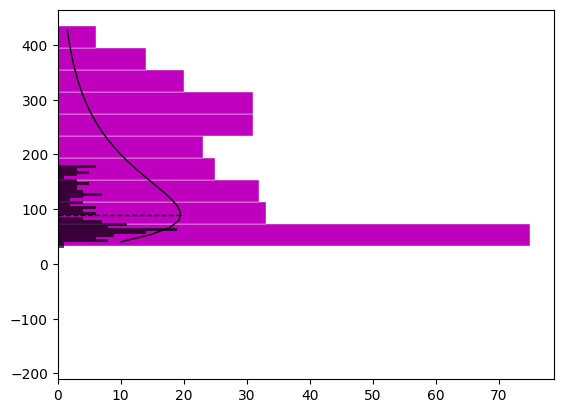

In [31]:
# caribic.bin_2d(var, xcoord, ycoord).vstdv.shape

import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()

bin_2d = caribic.bin_2d(o3, xcoord, ycoord, xbsize = 5)

bin_2d.plot_hist(ax=ax, bin_attr = 'vmean', color = 'm')



x_binned = getattr(bin_2d, 'vmean')
ax.hist(
    x_binned[~np.isnan(x_binned)], 
    bins = bin_2d.xbinlimits,# bin_2d.bin_nr,
    orientation = 'horizontal',
    color = 'k', alpha = 0.7,
    );

counts, bins = np.histogram(bin_2d.vmean[~np.isnan(bin_2d.vmean)],
             bins = bin_2d.xbinlimits)
display(counts, bins)

self = bin_2d
bin_center = bins[:-1] + np.diff(bins) / 2
self.shape, self.loc, self.scale = stats.lognorm.fit(self.x, floc = 0, *fit_kwargs)
fit_params = (self.shape, self.loc, self.scale)
normed_lognorm_fit = stats.lognorm.pdf(bin_center, *fit_params)

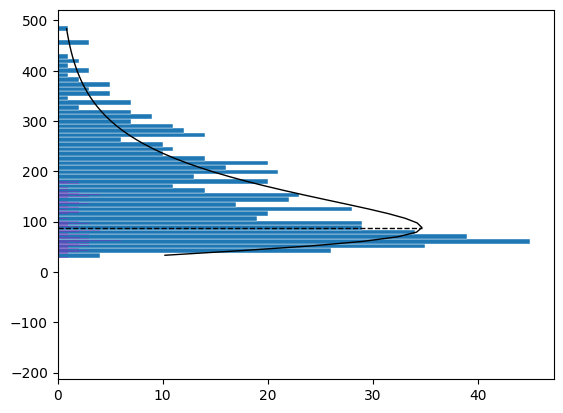

In [29]:
fig, ax = plt.subplots()

bin_2d = caribic.bin_2d(o3, xcoord, ycoord, xbsize = 0.5)

bin_2d.plot_hist(ax=ax, bin_attr = 'vmean')

x_binned = getattr(bin_2d, 'vmean')
ax.hist(
    x_binned[~np.isnan(x_binned)], 
    bins = bin_2d.xbinlimits,# bin_2d.bin_nr,
    orientation = 'horizontal',
    color = 'm', alpha = 0.3,
    );

In [4]:
caribic.bin_2d_seasonal(var, xcoord, ycoord, databased = False)[1].xintm

array([-175., -165., -155., -145., -135., -125., -115., -105.,  -95.,
        -85.,  -75.,  -65.,  -55.,  -45.,  -35.,  -25.,  -15.,   -5.,
          5.,   15.,   25.,   35.,   45.,   55.,   65.,   75.,   85.,
         95.,  105.,  115.,  125.,  135.,  145.,  155.,  165.,  175.])

In [5]:
var = dcts.get_subs('N2O')
xcoord = dcts.get_coord('geometry.x')
ycoord = dcts.get_coord('geometry.y')
zcoord = caribic.tps[-1]

self = caribic
kwargs = dict()
import numpy as np
import toolpac.calc.binprocessor as bp  # type: ignore

x = self.get_var_data(xcoord)
xbsize = kwargs.get('xbsize', xcoord.get_bsize())
xbmin, xbmax = self.get_var_lims(xcoord, bsize = xbsize)

y = self.get_var_data(ycoord)
ybsize = kwargs.get('ybsize', ycoord.get_bsize())
ybmin, ybmax = self.get_var_lims(ycoord, bsize = ybsize)

z = self.get_var_data(zcoord)
zbsize = kwargs.get('zbsize', zcoord.get_bsize())
zbmin, zbmax = self.get_var_lims(zcoord, bsize = zbsize)

bci_3d = kwargs.get('bci_3d', bp.Bin_equi3d(xbmin, xbmax, xbsize,
                                            ybmin, ybmax, ybsize,
                                            zbmin, zbmax, zbsize))


In [6]:
bci_3d.__dict__

{'xbmin': -180,
 'xbmax': 180,
 'xbsize': 10,
 'nx': 36,
 'xint': array([-180, -170, -160, -150, -140, -130, -120, -110, -100,  -90,  -80,
         -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,   10,   20,   30,
          40,   50,   60,   70,   80,   90,  100,  110,  120,  130,  140,
         150,  160,  170]),
 'xbinlimits': array([-180, -170, -160, -150, -140, -130, -120, -110, -100,  -90,  -80,
         -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,   10,   20,   30,
          40,   50,   60,   70,   80,   90,  100,  110,  120,  130,  140,
         150,  160,  170,  180]),
 'xintm': array([-175., -165., -155., -145., -135., -125., -115., -105.,  -95.,
         -85.,  -75.,  -65.,  -55.,  -45.,  -35.,  -25.,  -15.,   -5.,
           5.,   15.,   25.,   35.,   45.,   55.,   65.,   75.,   85.,
          95.,  105.,  115.,  125.,  135.,  145.,  155.,  165.,  175.]),
 'ybmin': -90,
 'ybmax': 90,
 'ybsize': 10,
 'ny': 18,
 'yint': array([-90, -80, -70, -60, -50, -40, -30, -20, -10,   0,

In [7]:
out = bp.Simple_bin_3d(np.array(self.df[var.col_name]), 
                        x, y, z, bci_3d, 
                        count_limit=self.count_limit)

In [16]:
caribic.calc_shared_ratios()

,N2O,int_CLaMS_N2O,int_dp_dtrop_hpa,int_dp_strop_hpa,int_h_rel_TP,int_pt_rel_dTP_K,int_pt_rel_sTP_K,int_z_rel_dTP_km,int_z_rel_sTP_km,int_ERA5_D_PRESS_thermTP,...,int_ERA5_D_PRESS_2_0,int_ERA5_D_PRESS_3_5,int_ERA5_D_THETA_thermTP,int_ERA5_D_THETA_1_5,int_ERA5_D_THETA_2_0,int_ERA5_D_THETA_3_5,int_ERA5_D_HEIGHT_thermTP,int_ERA5_D_HEIGHT_1_5,int_ERA5_D_HEIGHT_2_0,int_ERA5_D_HEIGHT_3_5
True,1568,1082,1659,1744,1488,1665,1745,1669,1749,1608,...,1087,1552,1600,891,1086,1554,1598,892,1088,1553
False,2265,2751,2174,2089,2345,2168,2088,2164,2084,2225,...,2746,2281,2233,2942,2747,2279,2235,2941,2745,2280
ratios,0.692274,0.393312,0.763109,0.834849,0.634542,0.767989,0.835728,0.771257,0.839251,0.722697,...,0.395849,0.680403,0.716525,0.302855,0.39534,0.681878,0.714989,0.303298,0.396357,0.68114


In [17]:
caribic.calc_non_shared_ratios()

,N2O,int_CLaMS_N2O,int_dp_dtrop_hpa,int_dp_strop_hpa,int_h_rel_TP,int_pt_rel_dTP_K,int_pt_rel_sTP_K,int_z_rel_dTP_km,int_z_rel_sTP_km,int_ERA5_D_PRESS_thermTP,...,int_ERA5_D_PRESS_2_0,int_ERA5_D_PRESS_3_5,int_ERA5_D_THETA_thermTP,int_ERA5_D_THETA_1_5,int_ERA5_D_THETA_2_0,int_ERA5_D_THETA_3_5,int_ERA5_D_HEIGHT_thermTP,int_ERA5_D_HEIGHT_1_5,int_ERA5_D_HEIGHT_2_0,int_ERA5_D_HEIGHT_3_5
True,1568,1082,1659,1744,1488,1665,1745,1669,1749,1608,...,1087,1552,1600,891,1086,1554,1598,892,1088,1553
False,2265,2751,2174,2089,2345,2168,2088,2164,2084,2225,...,2746,2281,2233,2942,2747,2279,2235,2941,2745,2280
ratios,0.692274,0.393312,0.763109,0.834849,0.634542,0.767989,0.835728,0.771257,0.839251,0.722697,...,0.395849,0.680403,0.716525,0.302855,0.39534,0.681878,0.714989,0.303298,0.396357,0.68114


In [6]:
caribic.tropo_strato_ratios('only_non_shared')

,N2O,int_CLaMS_N2O,int_dp_dtrop_hpa,int_dp_strop_hpa,int_h_rel_TP,int_pt_rel_dTP_K,int_pt_rel_sTP_K,int_z_rel_dTP_km,int_z_rel_sTP_km,int_ERA5_D_PRESS_thermTP,...,int_ERA5_D_PRESS_2_0,int_ERA5_D_PRESS_3_5,int_ERA5_D_THETA_thermTP,int_ERA5_D_THETA_1_5,int_ERA5_D_THETA_2_0,int_ERA5_D_THETA_3_5,int_ERA5_D_HEIGHT_thermTP,int_ERA5_D_HEIGHT_1_5,int_ERA5_D_HEIGHT_2_0,int_ERA5_D_HEIGHT_3_5
True,2899,3174,1507,3841,2108,1059,3194,1509,3871,3815,...,1107,1449,3809,930,1104,1445,3805,924,1110,1451
False,653,1940,1223,1366,976,786,868,1210,1318,1299,...,1576,1241,1303,1733,1581,1240,1309,1741,1576,1240
ratios,4.43951,1.636082,1.232216,2.811859,2.159836,1.347328,3.679724,1.247107,2.937026,2.936875,...,0.702411,1.167607,2.923254,0.536642,0.698292,1.165323,2.906799,0.530729,0.704315,1.170161


In [13]:
caribic.rms_seasonal_vstdv(dcts.get_subs('int_O3'), caribic.tps[5])

,rms_vstdv,rms_rvstd,vstdv_1,rvstd_1,vcount_1,vstdv_2,rvstd_2,vcount_2,vstdv_3,rvstd_3,vcount_3,vstdv_4,rvstd_4,vcount_4
-145.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
-135.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
-125.0,15.772146,0.299298,NaN,NaN,0.0,16.035204,0.280522,5.0,NaN,NaN,0.0,15.504625,0.316964,5.0
-115.0,11.373828,0.202904,15.915002,0.272411,7.0,6.213062,0.127725,5.0,NaN,NaN,0.0,9.044468,0.169764,9.0
-105.0,29.214851,0.470800,43.220499,0.671010,9.0,NaN,NaN,0.0,NaN,NaN,0.0,17.675936,0.315804,16.0
-95.0,16.202449,0.294318,16.975019,0.297359,10.0,10.751349,0.198518,5.0,21.493320,0.368062,5.0,15.571938,0.292557,23.0
-85.0,19.072401,0.312612,16.839058,0.300702,12.0,10.722023,0.168575,5.0,22.756048,0.331753,6.0,19.784628,0.324229,41.0
-75.0,20.480149,0.362866,19.093505,0.306701,11.0,16.107127,0.310763,11.0,20.335170,0.396423,9.0,21.881254,0.381854,38.0
-65.0,23.514736,0.412142,32.852460,0.522806,31.0,12.340714,0.223336,13.0,15.571026,0.276290,12.0,20.893203,0.400108,66.0
-55.0,39.139411,0.549477,62.794738,0.779759,86.0,28.387861,0.451964,16.0,16.447091,0.266878,44.0,25.434186,0.457501,159.0
